### Carga de datos

In [70]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import PIL.Image as Image

from skimage import io, color, transform
from skimage.feature import hog

import time

from sklearn.manifold import TSNE
import plotly.express as px

import mplcursors

In [71]:
images = np.load('DatosDF/images.npy', allow_pickle=True)
labels = np.load('DatosDF/labels.npy', allow_pickle=True)
estados = np.load('DatosDF/estados.npy',allow_pickle=True)
pca = np.load('DatosDF/pca.npy',allow_pickle=True)
names = np.load('DatosDF/names.npy',allow_pickle=True)
df = pd.DataFrame({'gray_matrix': images.tolist(), 'label': labels.tolist(),'estados': estados.tolist(),'pca': pca.tolist(),'names':names.tolist()})
df.head(5)

gray_matrix  label  estados  \
0  [[46, 34, 26, 23, 12, 32, 35, 26, 26, 38, 71, ...  angry        0   
1  [[55, 33, 54, 32, 26, 21, 50, 29, 38, 45, 79, ...  angry        0   
2  [[123, 123, 126, 131, 124, 69, 109, 149, 159, ...  angry        0   
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  angry        0   
4  [[127, 121, 124, 137, 123, 118, 120, 111, 111,...  angry        0   

                                                 pca                     names  
0  [0.1702883172748495, 0.05317091772893637, 0.46...  PrivateTest_10131363.jpg  
1  [1.8377573578512425, 0.30314031322916024, -0.6...  PrivateTest_10304478.jpg  
2  [1.3515531899239948, -0.6178842005412236, -0.2...   PrivateTest_1054527.jpg  
3  [1.432024963731606, 0.03464338512799553, 0.651...  PrivateTest_10590091.jpg  
4  [1.6783762986615753, 0.0871180425720805, -0.15...   PrivateTest_1109992.jpg

In [72]:
masnormales=df[df['estados']==1]
emociones=df['label'].unique()

# Distribucion T-SNE de emociones en la base reducida de FER13. 

In [73]:
X=pd.DataFrame(masnormales['pca'].to_list(),columns=['col_{}'.format(i) for i in range(len(masnormales['pca'].iloc[0]))])
y=masnormales['label']

### Grafico 1. Dos dimensiones (Perp 30 Iter 1000). Base pequeña diferenciando emociones.

In [74]:
tsn = TSNE(n_components=2,perplexity=30,n_iter=1000)
X_tsn = tsn.fit_transform(X)
labels = y.unique().tolist()

In [75]:
names = masnormales['names']
df_plotly = pd.DataFrame({'Dim1': X_tsn[:, 0], 'Dim2': X_tsn[:, 1], 'Label': y, 'names': names})
fig = px.scatter(df_plotly, x='Dim1', y='Dim2', color='Label', title='Distribucion TSN de emociones en la base reducida de FER',hover_data=['names'])
fig.update_layout(width=800, height=600)
fig.show()

### Grafico 2. Tres dimensiones (Perp 30 Iter 1000). Base pequeña diferenciando emociones.

In [76]:
tsn_pequeno_3d = TSNE(n_components=3, perplexity=30, n_iter=1000)
X_tsn_pequeno_3d = tsn_pequeno_3d.fit_transform(X)

df_peq_3d = pd.DataFrame({'Dim1': X_tsn_pequeno_3d[:, 0], 'Dim2': X_tsn_pequeno_3d[:, 1], 'Dim3': X_tsn_pequeno_3d[:, 2], 'Label': y, 'names': names})

In [77]:
fig = px.scatter_3d(df_peq_3d, x='Dim1', y='Dim2', z='Dim3', color='Label', title='t-SNE del dataset Clientes en 3D', width=1000, height=1000,
                    hover_data={'names': True, 'Label': True})

# Set custom hover template to display names
fig.update_traces(hovertemplate='Name: %{customdata[0]}<br>Label: %{customdata[1]}')

fig.show()


# T-SNE | DATOS GRANDES

In [79]:
X_grande=pd.DataFrame(df['pca'].to_list(),columns=['col_{}'.format(i) for i in range(len(df['pca'].iloc[0]))])
y_grande=df['label']

### Grafico 3. Dos dimensiones (Perp 30 Iter 1000). Base completa diferenciando emociones.

In [21]:
tsn_grande_2d = TSNE(n_components=2,perplexity=30,n_iter=1000)
X_grande_2d = tsn_grande_2d.fit_transform(X_grande)
labels_grande = y_grande.unique().tolist()
estados_grande = df['estados']
names_grande = df['names']

In [81]:
df_grande_2d = pd.DataFrame({'Dim1': X_grande_2d[:, 0], 'Dim2': X_grande_2d[:, 1], 'Label': y_grande, 'names': names_grande,'estado': df['estados']})
fig = px.scatter(df_grande_2d, x='Dim1', y='Dim2', color='Label', symbol='estado', 
                 title='Distribucion T-SNE de imagenes del FER13 segun emociones y estado',
                 hover_data=['names'])

fig.update_layout(width=1300, height=900)
fig.show()

In [58]:
import plotly.subplots as sp
import plotly.graph_objects as go

labels_grande = y_grande.unique().tolist()
estados_grande = df['estados']
names_grande = df['names']

fig = sp.make_subplots(rows=len(labels_grande), cols=1, subplot_titles=labels_grande,
                       shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.05)

for i, label in enumerate(labels_grande):

    subset_data = df[df['label'] == label]
    X_subset=pd.DataFrame(subset_data['hog'].to_list(),columns=['col_{}'.format(i) for i in range(len(subset_data['hog'].iloc[0]))])
    y_subset=subset_data['label']

    tsn_subset = TSNE(n_components=2, perplexity=30, n_iter=1000)

    X_subset_2d = tsn_subset.fit_transform(X_subset)

    subset_data = pd.DataFrame({'Dim1': X_subset_2d[:, 0], 'Dim2': X_subset_2d[:, 1], 'Label': y_subset, 'names': subset_data['names'],'estado': subset_data['estados']})

    fig.add_trace(go.Scatter(x=subset_data[:, 0], y=subset_data[:, 1],
                             mode='markers',
                             marker=dict(symbol='circle', size=6, color=subset_data['estados']),
                             name=f'{label}'),
                  row=i + 1, col=1)

fig.update_layout(height=len(labels_grande) * 450, width=800, title_text="Distribucion T-SNE de imagenes del FER13 segun emociones y estado")
fig.show()


InvalidIndexError: (slice(None, None, None), 0)

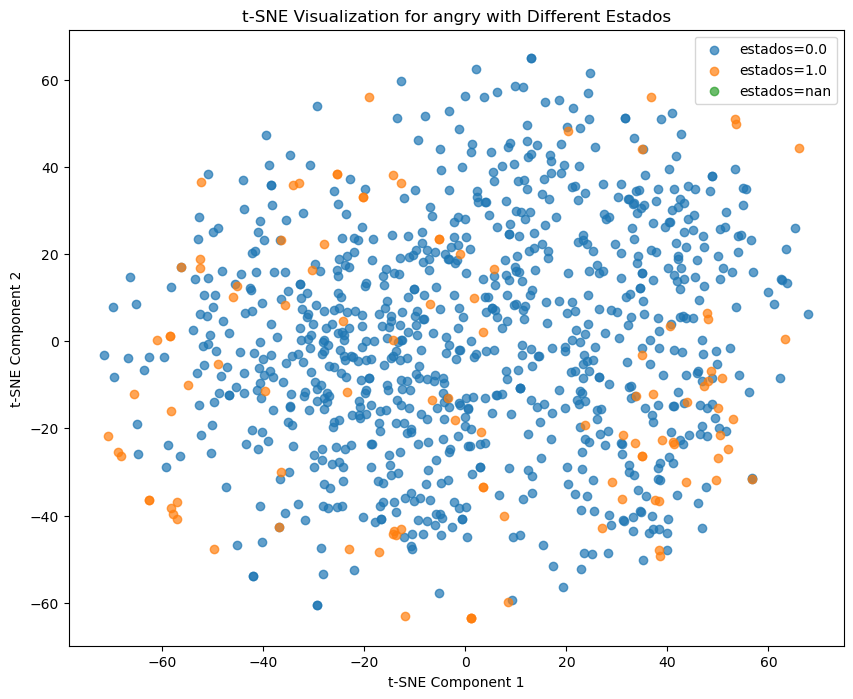

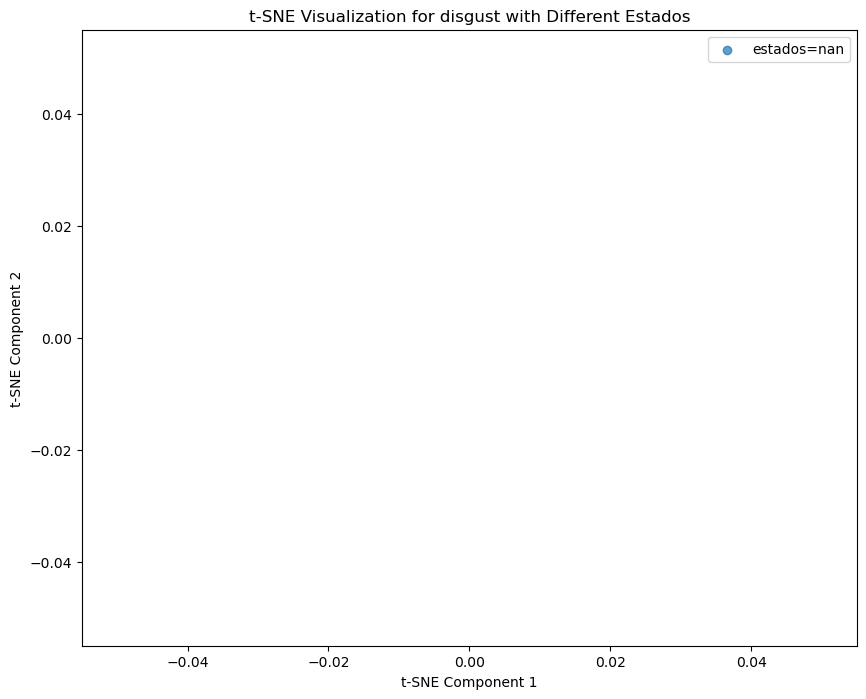

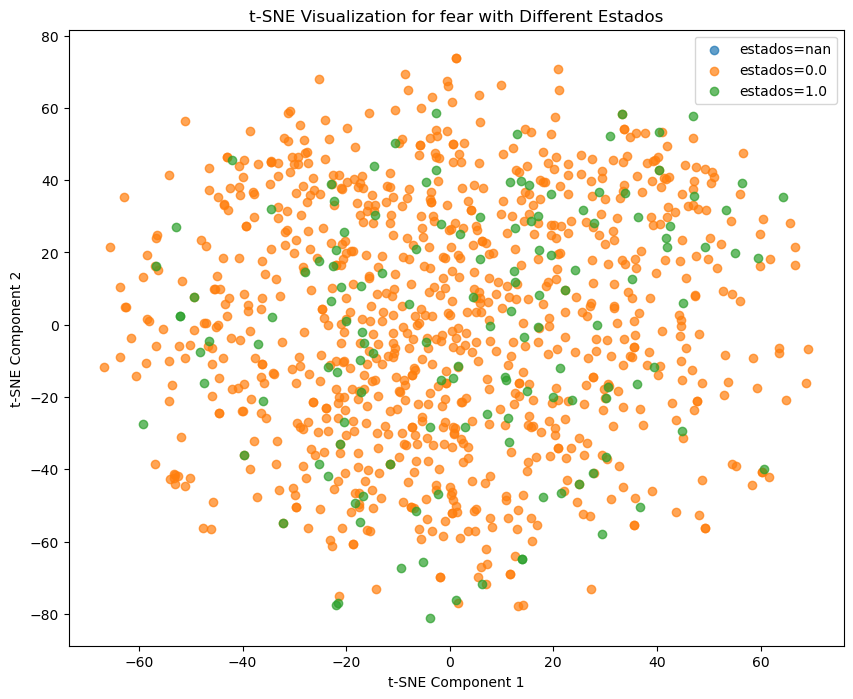

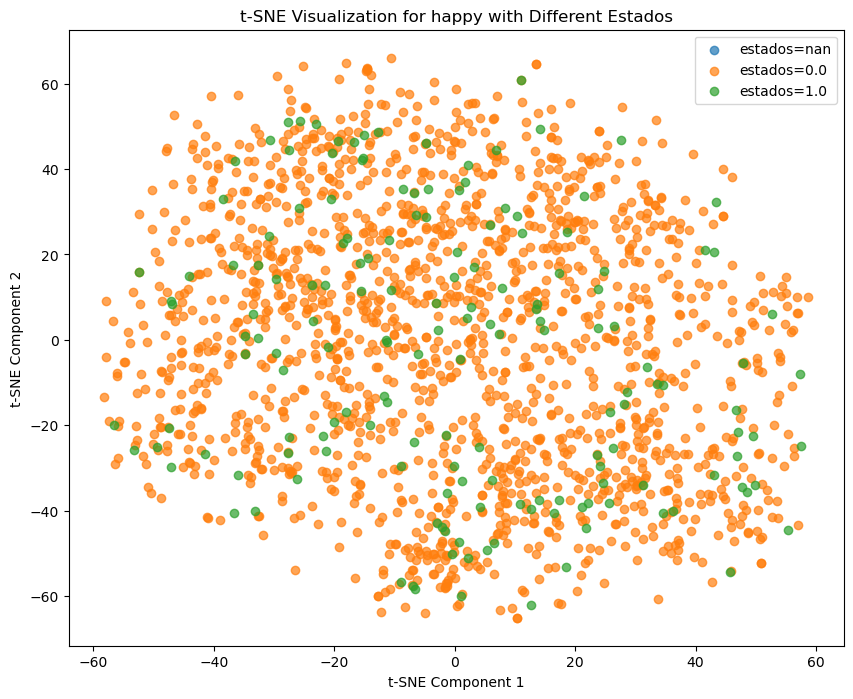

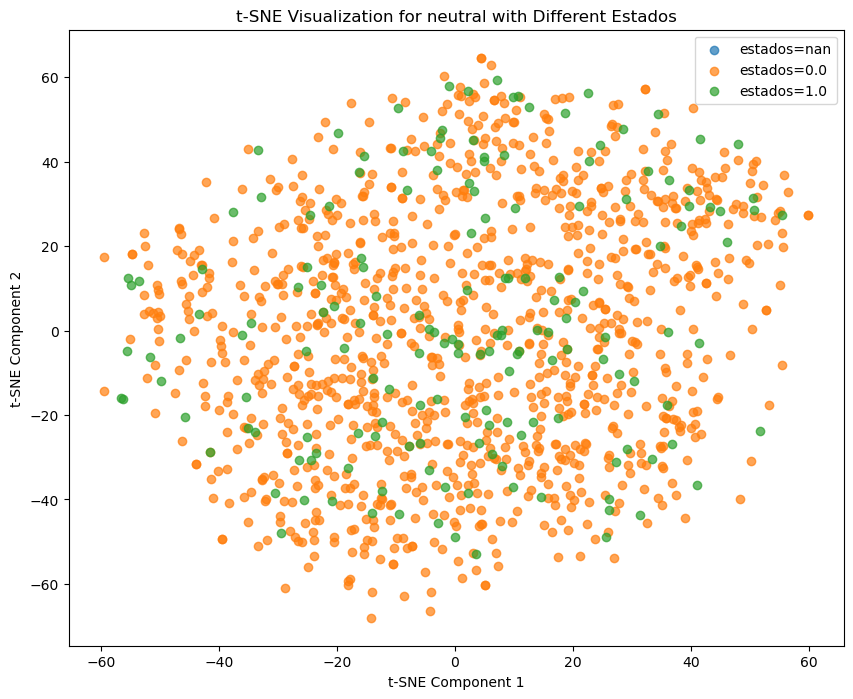

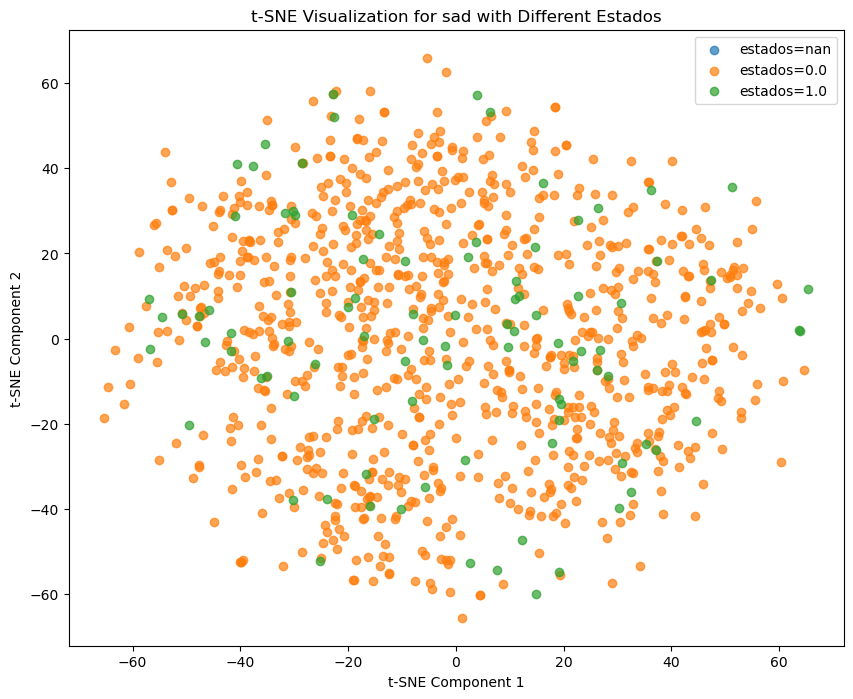

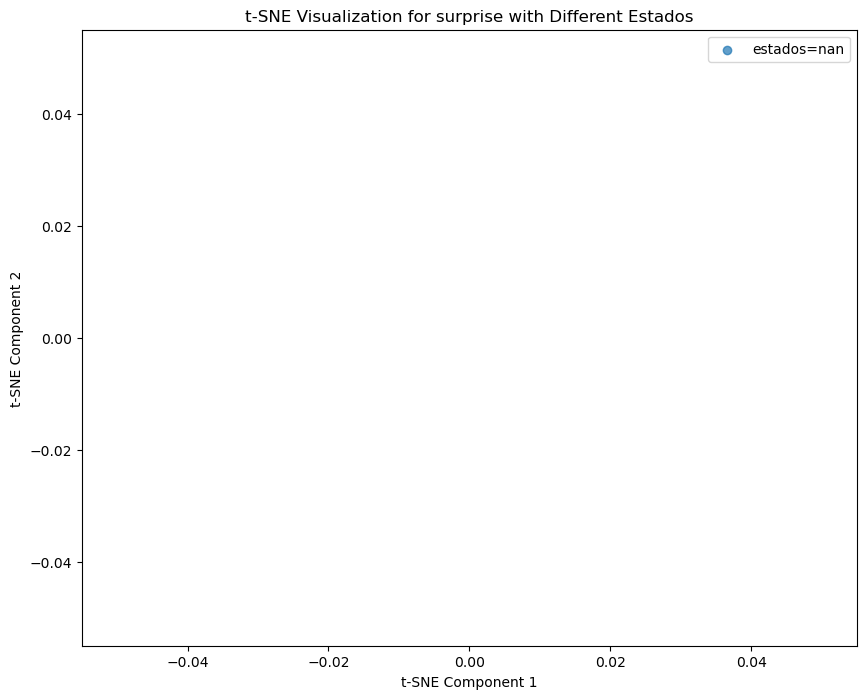

In [4]:
df['hog'] = df['hog'].apply(np.array)

X = np.stack(df['hog'].values)
y = df['label']
estados = df['estados']

# Get unique classes in the 'label' column
unique_classes = df['label'].unique()

# Reduce dimensionality with t-SNE for each class
for label in unique_classes:
    # Filter data for the current class
    subset_df = df[(df['label'] == label)]

    # Get the matrices and labels for the current class
    X_subset = np.stack(subset_df['hog'].values)
    y_subset = subset_df['label']
    estados_subset = subset_df['estados']

    # Reduce dimensionality with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_subset)

    # Create a new DataFrame with t-SNE coordinates and labels
    tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
    tsne_df['label'] = y_subset
    tsne_df['estados'] = estados_subset

    # Visualize the results
    plt.figure(figsize=(10, 8))
    for estado in tsne_df['estados'].unique():
        subset_estado = tsne_df[tsne_df['estados'] == estado]
        plt.scatter(subset_estado['TSNE1'], subset_estado['TSNE2'], label=f'estados={estado}', alpha=0.7)

    plt.title(f't-SNE Visualization for {label} with Different Estados')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()


## T-SNE Visualizando emociones del conjunto final

In [3]:
tdf = df.copy()
tdf['hog']=tdf['hog'].apply(np.array)
X = np.stack(tdf['hog'].values)
y = tdf['label']
estados = tdf['estados']

unique_classes = tdf['label'].unique()

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = y
tsne_df['estados'] = estados

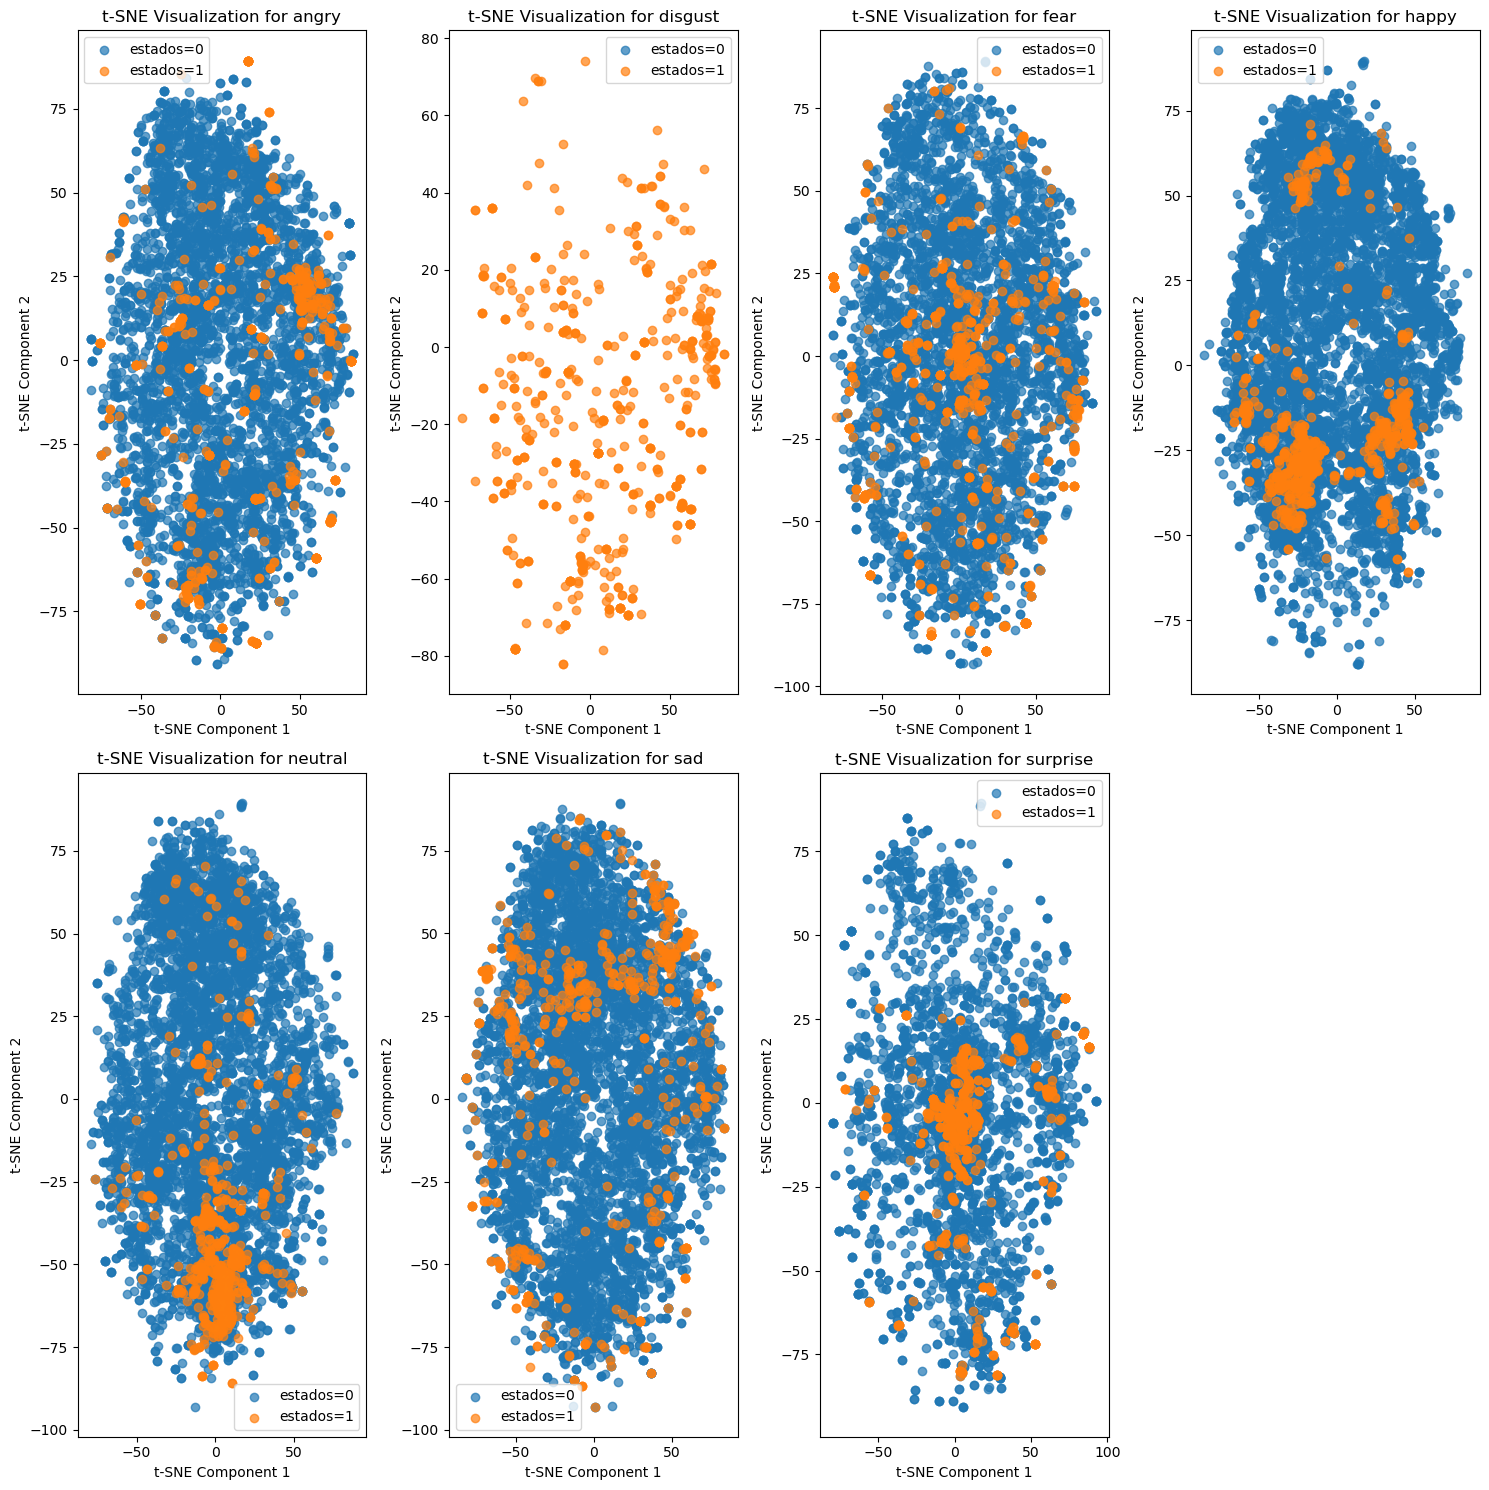

In [4]:
plt.figure(figsize=(15, 15))

for i, label in enumerate(unique_classes, start=1):
    plt.subplot(2, 4, i)  
    plt.title(f't-SNE Visualization for {label}')
    
    for estado in tsne_df['estados'].unique():
        subset_estado = tsne_df[(tsne_df['label'] == label) & (tsne_df['estados'] == estado)]
        plt.scatter(subset_estado['TSNE1'], subset_estado['TSNE2'], label=f'estados={estado}', alpha=0.7)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()

plt.tight_layout()
plt.show()